In [243]:
!pip install sqlalchemy
!pip install pymysql
!pip install mysql
!pip install pmdarima
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=6b0e0edad8aed792af5e408653bed2b79e70c9da060e33b9be705e47bef84340
  Stored in directory: c:\users\kevin hp\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [53]:
import pandas as pd
import numpy as np
import sqlalchemy
import pymysql 
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

# Base de datos con la que se va a trabajar:

<img src="files/SampleClassicmodels.png">

# Conectar Python con la base de datos:

In [5]:
#Conectar la base de datos
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='MyPassword',
                             db='classicmodels',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

cnx = connection.connect()

# Mostrar tablas de la base de datos:

In [7]:
tables = pd.read_sql('SHOW tables', con=connection)
tables

,Tables_in_classicmodels
0,customers
1,employees
2,offices
3,orderdetails
4,orders
5,payments
6,productlines
7,products


# Seleccionar el número de empleados que hay por país:

In [171]:
result = pd.read_sql("""SELECT 
                            o.country AS País, 
                            COUNT(e.employeeNumber) AS 'No. de Empleados'
                            
                        FROM employees e, offices o
                           
                        WHERE e.officeCode = o.officeCode
                        
                        GROUP BY o.country
                        
                        ORDER BY COUNT(e.employeeNumber) DESC
                           """, con=connection)
result

,País,No. de Empleados
0,USA,10
1,France,5
2,Australia,4
3,Japan,2
4,UK,2


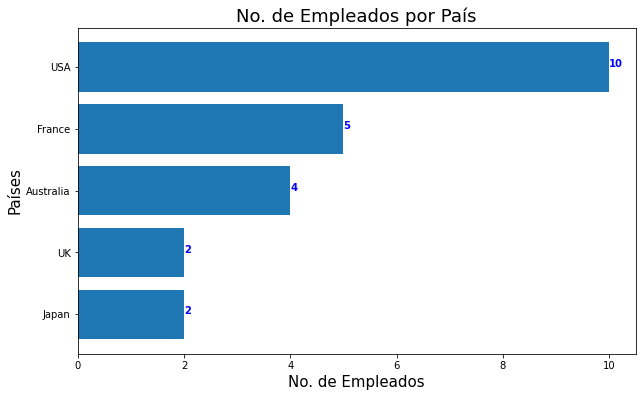

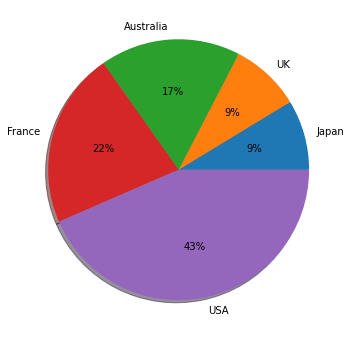

In [174]:
result = result.sort_values('No. de Empleados',ascending=True)

plt.figure(figsize=(10,6))
plt.barh('País', 'No. de Empleados',data=result)
plt.xlabel("No. de Empleados", size=15)
plt.ylabel("Países", size=15)
plt.title("No. de Empleados por País", size=18)

for i, v in enumerate(result['No. de Empleados']):
    plt.text(v, i, str(v), color='blue', fontweight='bold')
#plt.savefig("bar_plot_matplotlib_descending_order_Python.png")

labels = [n for n in result['País']]
sizes = np.array(result['No. de Empleados'].values)

def absolute_value(val):
    a  = str(np.round((np.round(val/100*sizes.sum(), 0))/sizes.sum()*100,0))
    return f'{"".join([n for n in a][:-2])}%'

plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, shadow=True, autopct=absolute_value)
plt.show()

# Crear una consulta donde me demuestre el nombre del vendedor , el  Total de clientes que atendió y el total de ventas que ha realizado

In [176]:
result = pd.read_sql("""SELECT 
                            CONCAT(e.firstName,"  ", e.lastName) as Vendedor, 
                            COUNT(DISTINCT(p.customerNumber)) as 'Total Clientes', 
                            SUM(p.amount) as Ventas
                            
                        FROM employees e
                        
                        JOIN customers o ON e.employeeNumber = o.salesRepEmployeeNumber
                        JOIN payments p ON o.customerNumber = p.customerNumber
                        
                        GROUP BY Vendedor
                        
                        ORDER BY Ventas DESC , 'Total Clientes' DESC
                           """, con=connection)
result

,Vendedor,Total Clientes,Ventas
0,Gerard Hernandez,7,1112003.81
1,Leslie Jennings,6,989906.55
2,Pamela Castillo,10,750201.87
3,Larry Bott,8,686653.25
4,Barry Jones,9,637672.65
5,George Vanauf,8,584406.80
6,Loui Bondur,6,569485.75
7,Andy Fixter,5,509385.82
8,Peter Marsh,5,497907.16
9,Foon Yue Tseng,6,488212.67


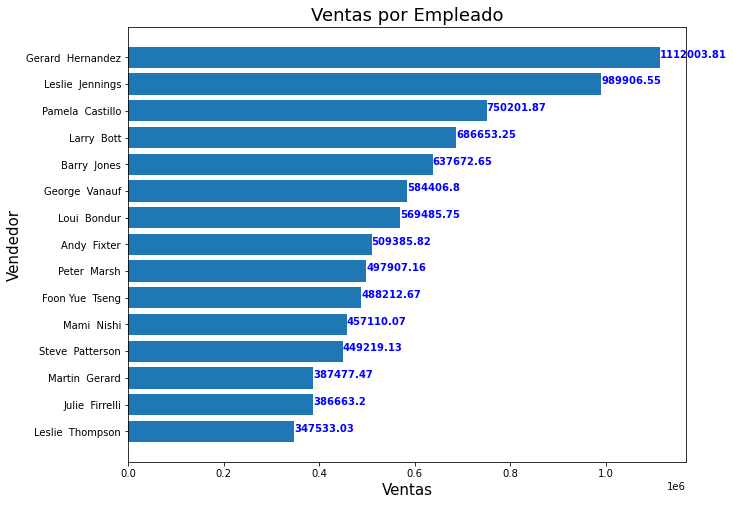

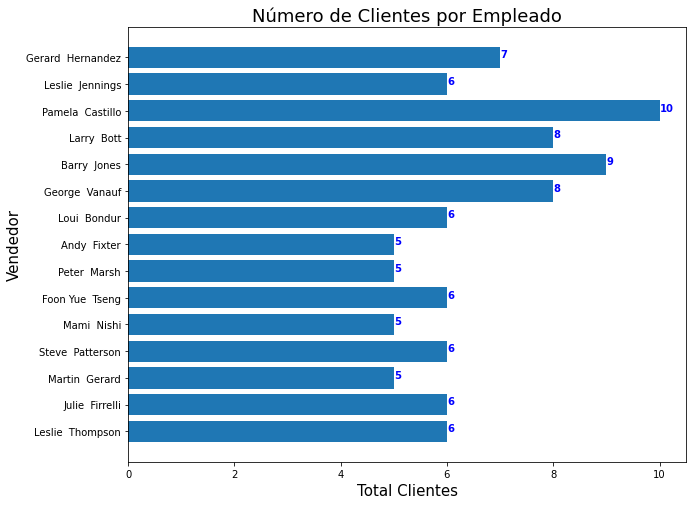

In [183]:
result = result.sort_values('Ventas',ascending=True)

plt.figure(figsize=(10,8))
plt.barh('Vendedor', 'Ventas',data=result)
plt.xlabel("Ventas", size=15)
plt.ylabel("Vendedor", size=15)
plt.title("Ventas por Empleado", size=18)

for i, v in enumerate(result['Ventas']):
    plt.text(v, i, str(v), color='blue', fontweight='bold')
        
result = result.sort_values('Ventas',ascending=True)

plt.figure(figsize=(10,8))
plt.barh('Vendedor', 'Total Clientes',data=result)
plt.xlabel("Total Clientes", size=15)
plt.ylabel("Vendedor", size=15)
plt.title("Número de Clientes por Empleado", size=18)

for i, v in enumerate(result['Total Clientes']):
    plt.text(v, i, str(v), color='blue', fontweight='bold')

# Cuáles son los top 7 Clientes de la empresa y cuánto nos han aportado en ventas

In [213]:
result = pd.read_sql("""SELECT 
                            c.customerNumber AS "ID", 
                            c.customerName AS "Cliente", 
                            SUM(p.amount) as "Ventas"
                            
                        FROM customers c
                              
                        JOIN payments p ON p.customerNumber = c.customerNumber
                                                     
                        GROUP BY ID
                        
                        ORDER BY COUNT(c.customerNumber) DESC
                        
                        LIMIT 7""", con=connection)
result

,ID,Cliente,Ventas
0,141,Euro+ Shopping Channel,715738.98
1,124,Mini Gifts Distributors Ltd.,584188.24
2,148,"Dragon Souveniers, Ltd.",156251.03
3,114,"Australian Collectors, Co.",180585.07
4,145,Danish Wholesale Imports,107446.50
5,121,Baane Mini Imports,104224.79
6,128,"Blauer See Auto, Co.",75937.76


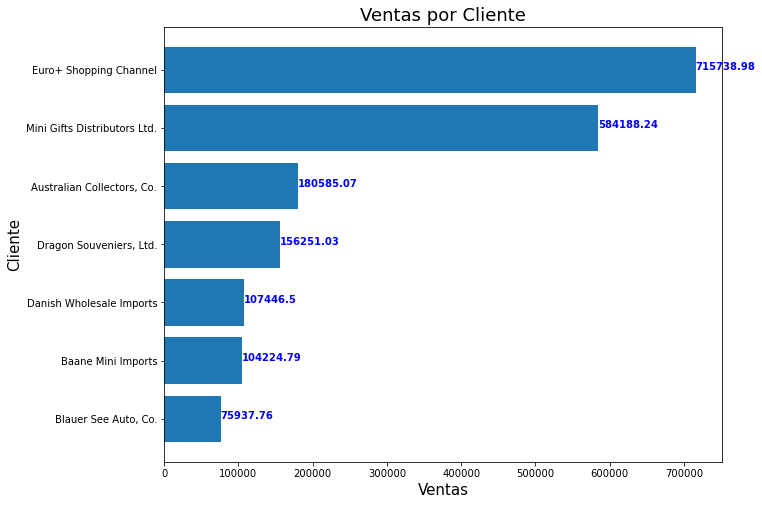

In [214]:
result = result.sort_values('Ventas',ascending=True)

plt.figure(figsize=(10,8))
plt.barh('Cliente', 'Ventas',data=result)
plt.xlabel("Ventas", size=15)
plt.ylabel("Cliente", size=15)
plt.title("Ventas por Cliente", size=18)

for i, v in enumerate(result['Ventas']):
    plt.text(v, i, str(v), color='blue', fontweight='bold')

# Cuántas Ventas se han hecho por cada linea de Producto

In [217]:
result = pd.read_sql("""SELECT 
                            p.productLine AS 'Linea de Producto',
                            SUM(o.quantityOrdered * o.priceEach) AS Ventas
                        FROM
                            orderdetails o, products p
                        WHERE o.productCode = p.productCode
                        GROUP BY p.productLine
                        ORDER BY Ventas DESC""", con=connection)

result

,Linea de Producto,Ventas
0,Classic Cars,3853922.49
1,Vintage Cars,1797559.63
2,Motorcycles,1121426.12
3,Trucks and Buses,1024113.57
4,Planes,954637.54
5,Ships,663998.34
6,Trains,188532.92


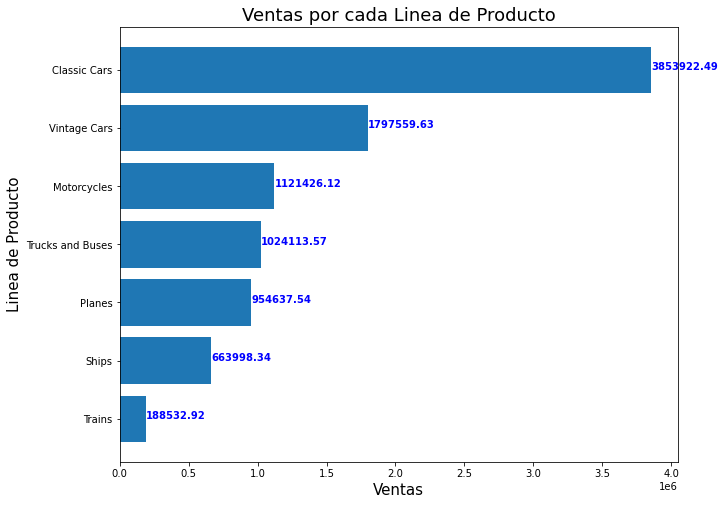

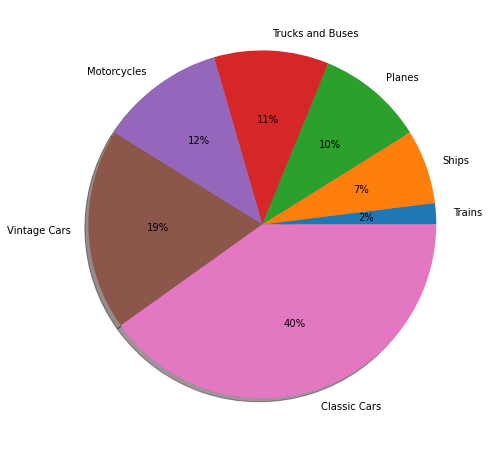

In [220]:
result = result.sort_values('Ventas',ascending=True)

plt.figure(figsize=(10,8))
plt.barh('Linea de Producto', 'Ventas',data=result)
plt.xlabel("Ventas", size=15)
plt.ylabel("Linea de Producto", size=15)
plt.title("Ventas por cada Linea de Producto", size=18)

for i, v in enumerate(result['Ventas']):
    plt.text(v, i, str(v), color='blue', fontweight='bold')
    
    
labels = [n for n in result['Linea de Producto']]
sizes = np.array(result['Ventas'].values)

def absolute_value(val):
    a  = str(np.round((np.round(val/100*sizes.sum(), 0))/sizes.sum()*100,0))
    return f'{"".join([n for n in a][:-2])}%'

plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, shadow=True, autopct=absolute_value)
plt.show()

# Cuántos productos hay por cada linea de producto

In [221]:
result = pd.read_sql("""SELECT l.productLine AS 'Product Line', COUNT(p.productName) AS 'Products'
                        FROM productlines l, products p
                        WHERE (l.productLine = p.productLine)
                        GROUP BY p.productLine
                        ORDER BY Products DESC""", con=connection)
result

,Product Line,Products
0,Classic Cars,38
1,Vintage Cars,24
2,Motorcycles,13
3,Planes,12
4,Trucks and Buses,11
5,Ships,9
6,Trains,3


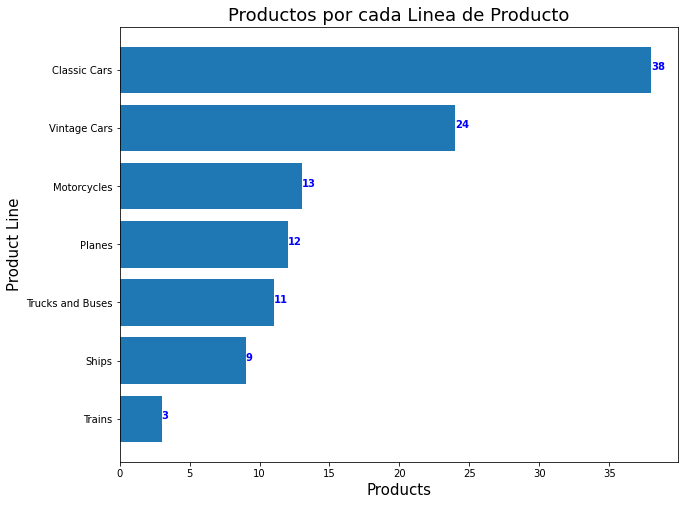

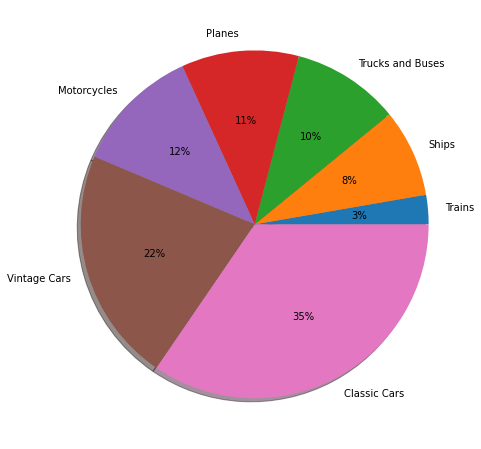

In [222]:
result = result.sort_values('Products',ascending=True)

plt.figure(figsize=(10,8))
plt.barh('Product Line', 'Products',data=result)
plt.xlabel("Products", size=15)
plt.ylabel("Product Line", size=15)
plt.title("Productos por cada Linea de Producto", size=18)

for i, v in enumerate(result['Products']):
    plt.text(v, i, str(v), color='blue', fontweight='bold')
    
    
labels = [n for n in result['Product Line']]
sizes = np.array(result['Products'].values)

def absolute_value(val):
    a  = str(np.round((np.round(val/100*sizes.sum(), 0))/sizes.sum()*100,0))
    return f'{"".join([n for n in a][:-2])}%'

plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, shadow=True, autopct=absolute_value)
plt.show()

# Hacer una serie de tiempo de las ventas que ha realizado la empresa mensualemente

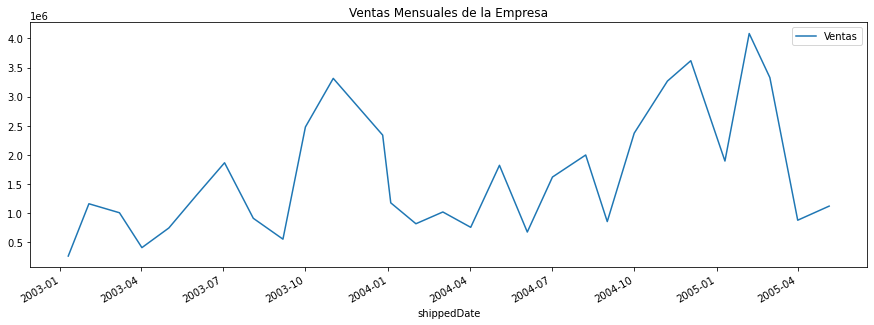

,Ventas
shippedDate,
2003-01-10,264884.69
2003-02-02,1162579.90
2003-03-08,1008184.43
2003-04-02,409756.53
2003-05-02,747256.20
2003-06-02,1312793.87
2003-07-03,1865750.98
2003-08-04,912977.98
2003-09-06,555063.20


In [279]:
result = pd.read_sql("""SELECT o.shippedDate, SUM(p.amount) as 'Ventas'
                        FROM payments p ,  orders o
                        WHERE (p.customerNumber = o.customerNumber) 
                        AND o.status = 'shipped' 
                        GROUP BY YEAR(o.shippedDate) ,MONTH(o.shippedDate)""", con=connection)

result['shippedDate'] = pd.to_datetime(result['shippedDate'], format='%Y/%m/%d')
result.set_index(result['shippedDate'], inplace=True)
result.drop(columns = ['shippedDate'], inplace=True)

result.plot(figsize = (15,5))
plt.title('Ventas Mensuales de la Empresa')
plt.show()

result

# Hacer una serie de tiempo de las ventas mensuales de la linea de producto de carros clásicos con estatus de enviado al cliente

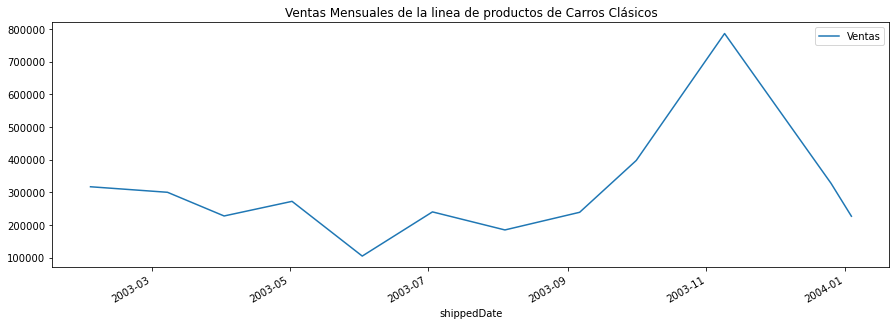

,productLine,Ventas
shippedDate,,
2003-02-02,Classic Cars,317035.82
2003-03-08,Classic Cars,300093.77
2003-04-02,Classic Cars,227552.68
2003-05-02,Classic Cars,272344.67
2003-06-02,Classic Cars,104750.27
2003-07-03,Classic Cars,240051.26
2003-08-04,Classic Cars,184769.63
2003-09-06,Classic Cars,238832.37
2003-10-01,Classic Cars,397596.77


In [235]:
result = pd.read_sql("""SELECT 
                            r.shippedDate,
                            p.productLine,
                            SUM(o.quantityOrdered * o.priceEach) AS Ventas
                        FROM
                            orderdetails o
                            
                        JOIN products p ON p.productCode = o.productCode
                        JOIN orders r ON o.orderNumber = r.orderNumber
                        
                        WHERE p.productLine = 'Classic cars'
                        AND r.status = 'Shipped'
                                               
                        GROUP BY p.productLine, r.status, MONTH(r.shippedDate)
                        ORDER BY YEAR(r.shippedDate) ASC, MONTH(r.shippedDate) ASC""", con=connection)


result['shippedDate'] = pd.to_datetime(result['shippedDate'], format='%Y/%m/%d')
result.set_index(result['shippedDate'], inplace=True)
result.drop(columns = ['shippedDate'], inplace=True)

result.plot(figsize = (15,5))
plt.title('Ventas Mensuales de la linea de productos de Carros Clásicos')
plt.show()


result

# Hacer una serie de tiempo de la linea de productos de los carros vintage con estatus de enviado al cliente

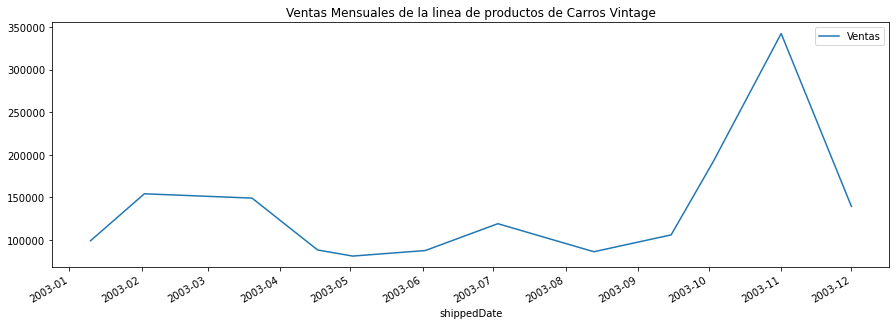

,productLine,Ventas
shippedDate,,
2003-01-10,Vintage Cars,98929.83
2003-02-02,Vintage Cars,154113.53
2003-03-20,Vintage Cars,149045.21
2003-04-17,Vintage Cars,88134.02
2003-05-02,Vintage Cars,80965.34
2003-06-02,Vintage Cars,87466.68
2003-07-03,Vintage Cars,118993.50
2003-08-13,Vintage Cars,86067.36
2003-09-15,Vintage Cars,105846.80


In [234]:
result = pd.read_sql("""SELECT 
                            r.shippedDate,
                            p.productLine,
                            SUM(o.quantityOrdered * o.priceEach) AS Ventas
                        FROM
                            orderdetails o
                            
                        JOIN products p ON p.productCode = o.productCode
                        JOIN orders r ON o.orderNumber = r.orderNumber
                        
                        WHERE p.productLine = 'Vintage cars'
                        AND r.status = 'Shipped'
                                               
                        GROUP BY p.productLine, r.status, MONTH(r.shippedDate)
                        ORDER BY YEAR(r.shippedDate) ASC, MONTH(r.shippedDate) ASC""", con=connection)


result['shippedDate'] = pd.to_datetime(result['shippedDate'], format='%Y/%m/%d')
result.set_index(result['shippedDate'], inplace=True)
result.drop(columns = ['shippedDate'], inplace=True)

result.plot(figsize = (15,5))
plt.title('Ventas Mensuales de la linea de productos de Carros Vintage')
plt.show()


result

# Hacer una series de tiempo de la linea de productos de Barcos con estatus de enviado al cliente

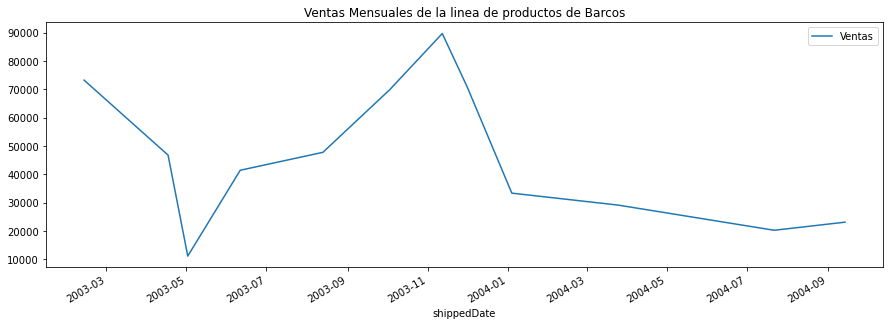

,productLine,Ventas
shippedDate,,
2003-02-12,Ships,73226.72
2003-04-17,Ships,46769.32
2003-05-02,Ships,11151.77
2003-06-11,Ships,41436.42
2003-08-13,Ships,47757.54
2003-10-03,Ships,69887.34
2003-11-12,Ships,89681.54
2003-12-01,Ships,70838.34
2004-01-04,Ships,33361.23


In [233]:
result = pd.read_sql("""SELECT 
                            r.shippedDate,
                            p.productLine,
                            SUM(o.quantityOrdered * o.priceEach) AS Ventas
                        FROM
                            orderdetails o
                            
                        JOIN products p ON p.productCode = o.productCode
                        JOIN orders r ON o.orderNumber = r.orderNumber
                        
                        WHERE p.productLine = 'Ships'
                        AND r.status = 'Shipped'
                                               
                        GROUP BY p.productLine, r.status, MONTH(r.shippedDate)
                        ORDER BY YEAR(r.shippedDate) ASC, MONTH(r.shippedDate) ASC""", con=connection)


result['shippedDate'] = pd.to_datetime(result['shippedDate'], format='%Y/%m/%d')
result.set_index(result['shippedDate'], inplace=True)
result.drop(columns = ['shippedDate'], inplace=True)

result.plot(figsize = (15,5))
plt.title('Ventas Mensuales de la linea de productos de Barcos')
plt.show()


result

# Hacer una series de tiempo de la linea de productos de Barcos con estatus de enviado al cliente

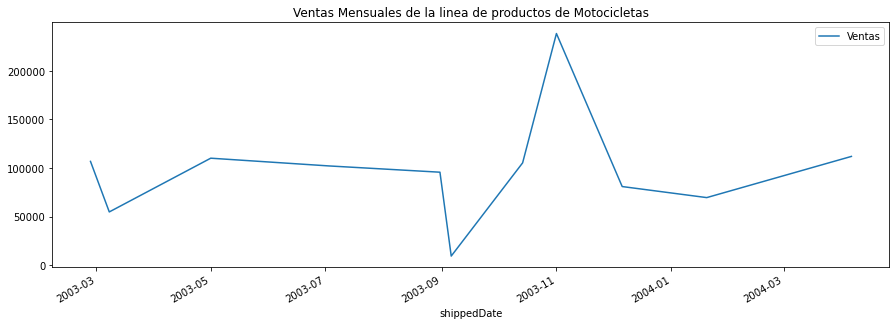

,productLine,Ventas
shippedDate,,
2003-02-26,Motorcycles,106800.13
2003-03-08,Motorcycles,54788.61
2003-05-01,Motorcycles,110098.77
2003-07-03,Motorcycles,102125.12
2003-08-31,Motorcycles,95682.03
2003-09-06,Motorcycles,9348.86
2003-10-14,Motorcycles,105281.75
2003-11-01,Motorcycles,238419.10
2003-12-06,Motorcycles,80910.97


In [238]:
result = pd.read_sql("""SELECT 
                            r.shippedDate,
                            p.productLine,
                            SUM(o.quantityOrdered * o.priceEach) AS Ventas
                        FROM
                            orderdetails o
                            
                        JOIN products p ON p.productCode = o.productCode
                        JOIN orders r ON o.orderNumber = r.orderNumber
                        
                        WHERE p.productLine = 'Motorcycles'
                        AND r.status = 'Shipped'
                                               
                        GROUP BY p.productLine, r.status, MONTH(r.shippedDate)
                        ORDER BY YEAR(r.shippedDate) ASC, MONTH(r.shippedDate) ASC""", con=connection)


result['shippedDate'] = pd.to_datetime(result['shippedDate'], format='%Y/%m/%d')
result.set_index(result['shippedDate'], inplace=True)
result.drop(columns = ['shippedDate'], inplace=True)

result.plot(figsize = (15,5))
plt.title('Ventas Mensuales de la linea de productos de Motocicletas')
plt.show()


result